In [1]:
%reload_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

from manofunkcijos import *

import requests
from bs4 import BeautifulSoup
from selenium import webdriver # naršyklės kontroleris
from selenium.webdriver.chrome.options import Options #Naršyklės
# pip install beautifulsoup4 selenium

In [5]:
url = 'https://kauno.diena.lt/'

page = requests.get(url)
source = page.content

bs = BeautifulSoup(source, 'html.parser')



In [10]:
straipsniai = bs.find_all('div', {'class':'category-block-row grid-12 alpha omega unscore'})
print(len(straipsniai))

41


In [14]:
for s in straipsniai:
    i = s.find('div', {'class':'articles-list-title-wrapper'})
    if i is not None:
        t = i.find('a', {'class':'articles-list-title'})
        print('::REM::')
        print(t)
        print('HREF?')
        print(t['href'])
        print(t.text)

::REM::
<a class="articles-list-title" href="naujienos/kaunas/miesto-pulsas/v-matijosaitis-miestas-nesustojo-tik-paciu-kaunieciu-deka-1195275" style="font-size: 16px;line-height: 1.2;margin-bottom: 10px;display: inline;">V. Matijošaitis: miestas nesustojo tik pačių kauniečių dėka</a>
HREF?
naujienos/kaunas/miesto-pulsas/v-matijosaitis-miestas-nesustojo-tik-paciu-kaunieciu-deka-1195275
V. Matijošaitis: miestas nesustojo tik pačių kauniečių dėka
::REM::
<a class="articles-list-title" href="naujienos/kaunas/miesto-pulsas/kauno-diena-pristato-kauno-detales-kuo-skiriasi-argentinka-nuo-brazilkos-1195282" style="font-size: 16px;line-height: 1.2;margin-bottom: 10px;display: inline;">„Kauno diena“ pristato „Kauno detales“: kuo skiriasi Argentinka nuo Brazilkos?</a>
HREF?
naujienos/kaunas/miesto-pulsas/kauno-diena-pristato-kauno-detales-kuo-skiriasi-argentinka-nuo-brazilkos-1195282
„Kauno diena“ pristato „Kauno detales“: kuo skiriasi Argentinka nuo Brazilkos?
::REM::
<a class="articles-list-titl

In [15]:
url = 'https://kauno.diena.lt/naujienos/kaunas/miesto-pulsas/v-matijosaitis-miestas-nesustojo-tik-paciu-kaunieciu-deka-1195275'
page = requests.get(url)
source = page.content

bs = BeautifulSoup(source, 'html.parser')

In [16]:
straipsniai = bs.find_all('span', {'itemprop':'articleBody'})
print(len(straipsniai))

1


In [20]:
print(straipsniai[0].text)

– Devyneri su puse metų – greitai minėsite dešimtmečio sukaktį. Dar užpernai pasiekėte rekordą, būdamas ilgiausiai dirbančiu Kauno meru per nepriklausomybės laikotarpį. Ką jums tai reiškia?
– Nesureikšminu tų skaičių ir rekordų, bet viena žinau, kad pats nebejaunėju. Gal dėl to ir norisi dar daug ką suspėti. Atrodo, nuveikta tikrai nemažai, bet kai pažiūriu, kiek visko priplanuota... Esu ramus, kad ateičiai nemažai projektų jau paruošta, kiti – rengimo stadijoje. Idėjų mūsų komandai niekada netrūko – reikia tik užtektinai finansų ir šiek tiek laiko joms įgyvendinti. Gal dar kokių dešimties metų (juokiasi)...
– Jūs šypsotės, bet daugelis išties norėtų sužinoti, kiek dar turite ambicijų tęsti darbus Kauno mero poste?
– Čia vienas dažnesnių klausimų, į kurį atsakymo pats sau neturiu. Tai niekada nebuvo mano asmeninė ambicija. Turėjau tik labai konkretų norą – sutvarkyti, pakeisti miestą. Pamenu, kažkada išvis galvojau neiti į šitas pareigas, po rinkimų 2015-aisiais domėjausi, kaip galėčia

In [ ]:
# Surinkite visus straipsnių pavadinimus ir nuorodas į pačius straipsnius iš Kauno  diena puslapio.
# Suraskite vidutinį straipsnių pavadinimuose esančių žodžių skaičių. Atvaizduoikite grafiškai straipsnių kiekį VS žodžių kiekis pavadinime. 
# Suraskite ilgiausią pavadinimą, nueikite į tą straipsnį, suraskite 5kis dažniausiai pasikartojančius žodžius, iliustruokite grafiškai. 
# Suskaičiuokite, kiek vidutiniškai turi žodžių straipsniai, esantys Kauno dienoje.

In [153]:
url = 'https://kauno.diena.lt/'

page = requests.get(url)
source = page.content

bs = BeautifulSoup(source, 'html.parser')

In [154]:
straipsniai = bs.find_all('div', {'class':'category-block-row grid-12 alpha omega unscore'})
print(len(straipsniai))

41


In [155]:
strp_pav = []
strp_nuor = []
ant_ilg = []

for s in straipsniai:
    i = s.find('div', {'class':'articles-list-title-wrapper'})
    if i is not None:
        t = i.find('a', {'class':'articles-list-title'})
        strp_pav.append(t.text)
        ant_ilg.append(len(t.text.split()))
        x = t['href']
        c = x.count('http')
        if c !=0:
            strp_nuor.append(x)
        else:
            strp_nuor.append(url+x)
avg_ant_ilg = sum(ant_ilg)/len(ant_ilg)
print(strp_pav,'\n',strp_nuor, '\n', ant_ilg, '\n', avg_ant_ilg)

['V. Matijošaitis: miestas nesustojo tik pačių kauniečių dėka', 'Širdį glostanti eilė: kauniečiai nori spėti iš anksto balsuoti Seimo rinkimuose', 'Lietuvis ir rusė bus teisiami už tai, kad pelnėsi iš kitų asmenų prostitucijos', 'Penktadienį Kaune pradedamas šildymo sezonas', 'Jonavos pareigūnams su įkalčiais įkliuvo kontrabandininkas', 'Veiksmas Partizanų gatvėje: pareigūnai šturmavo automobilį, sulaikytas vyras', 'Darbdavio magija: kas darbuotoją skatina įsitraukti ir augti?', 'Akibrokštas privačiai greitajai pagalbai: 50 įdarbintų žmonių valstybei neįdomu?', 'O dabar pakalbėkime apie… nieką', 'Vilniaus rajone už daugiau nei 835 tūkst. eurų bus modernizuojamos sveikatos centro paslaugos', 'Po šaudynių Vilniaus centre – diskusijos: ar reikia griežtinti ginklų kontrolę?', 'L. Kasčiūnas apdovanojo iš Libano Lietuvos piliečius evakavusius karius ir civilius', 'Auskarų vėrimo meistrė G. Balevičė – apie grožį, kantrybę, profesionalumą ir truputėlį skausmo', 'Tvari mada: dėvėta nereiškia sk

In [156]:
df = pd.DataFrame(strp_pav)
df['Pav'] = pd.DataFrame(data=strp_pav)
df['Ant_ilgis'] = pd.DataFrame(data=ant_ilg)
df['Nuoroda'] = pd.DataFrame(data=strp_nuor)
df = df[['Pav','Ant_ilgis','Nuoroda']]
df.head()

,Pav,Ant_ilgis,Nuoroda
0,V. Matijošaitis: miestas nesustojo tik pačių k...,8,https://kauno.diena.lt/naujienos/kaunas/miesto...
1,Širdį glostanti eilė: kauniečiai nori spėti iš...,11,https://kauno.diena.lt/naujienos/kaunas/miesto...
2,"Lietuvis ir rusė bus teisiami už tai, kad peln...",13,https://kauno.diena.lt/naujienos/kriminalai/nu...
3,Penktadienį Kaune pradedamas šildymo sezonas,5,https://kauno.diena.lt/naujienos/kaunas/miesto...
4,Jonavos pareigūnams su įkalčiais įkliuvo kontr...,6,https://kauno.diena.lt/naujienos/kaunas/nusika...


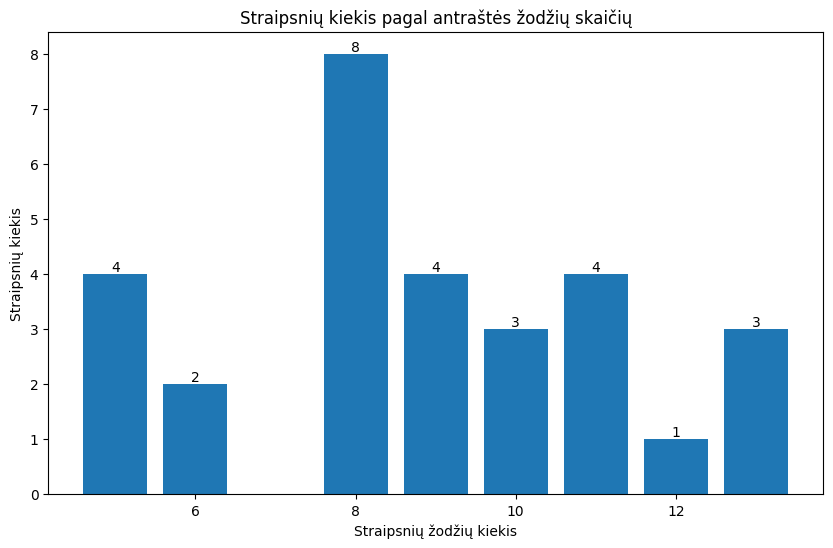

In [157]:
fig, axes = plt.subplots(figsize=(10,6))
df_str = df.groupby(['Ant_ilgis'])['Pav'].count().reset_index()
axes.set_title('Straipsnių kiekis pagal antraštės žodžių skaičių')
# ax = sns.barplot(data=df_str, x = 'Pav', y='Ant_ilgis', ax=axes)
axes.set(ylabel='Straipsnių kiekis',xlabel='Straipsnių žodžių kiekis')
# # axes.legend(labels=df_str['Ant_ilgis'])
# for container in ax.containers:
#     ax.bar_label(container)
# plt.show()
a = axes.bar(df_str['Ant_ilgis'],df_str['Pav'])
axes.bar_label(a)
# axes.set_title('Dalyvių skaičius')
plt.show()

In [118]:
df_new = df.sort_values(by=['Ant_ilgis'],ascending=False)[:1]
ilg_nuor = df_new['Nuoroda']
page = requests.get(ilg_nuor.values[0])
source = page.content
bs = BeautifulSoup(source, 'html.parser')

straipsniai = bs.find_all('span', {'itemprop':'articleBody'})
print(straipsniai[0].text)
straipsnis = straipsniai[0].text
zodziai = straipsniai[0].text.split()
kiekiai = []
for zodis in zodziai:
    x = straipsnis.count(zodis)
    kiekiai.append(x)
print(zodziai)
print(kiekiai)

Anot Vilniaus rajono savivaldybės, projekte dalyvaus Vilniaus rajono centrinė bei Nemenčinės poliklinikos.
„Savivaldybė nuolat ieško sprendimų, kurie pagerintų Vilniaus rajono pacientų sveikatos priežiūros kokybę bei medicinos specialistų darbo efektyvumą. Esame įsitikinę, kad šis projektas ne tik prisidės prie modernių ir funkcionalių sprendimų, geresnių sveikatos centro veiklos rezultatų, bet ir padės geriau tenkinti pacientų poreikius“, – pranešime teigė Vilniaus rajono savivaldybės meras Robertas Duchnevičius.
Įgyvendinant projektą numatytose sveikatos priežiūros įstaigose ketinama įdiegti paslaugų teikimo modelius, kurie pagerintų prieinamumą ir kokybę pacientams, sergantiems lėtinėmis ligomis, tokiomis kaip cukrinis diabetas, hipertenzija, širdies ritmo sutrikimai ir širdies nepakankamumas.
Planuojama sudaryti iš viso 12 daugiadalykių specialistų komandų, į kurias įeitų šeimos gydytojai, slaugytojai, kineziterapeutai, kardiologai ir endokrinologai – devynios komandos Vilniaus raj

In [119]:
str_df = pd.DataFrame(zodziai)
str_df['Zodis'] = pd.DataFrame(data=zodziai)
str_df['Kiekis'] = pd.DataFrame(data=kiekiai)
str_df = str_df[['Zodis','Kiekis']].groupby(['Zodis'])['Kiekis'].mean().reset_index().sort_values(by=['Kiekis'],ascending=False)[:5]
str_df.head()

,Zodis,Kiekis
41,ir,8.0
124,į,7.0
87,prie,6.0
67,ne,6.0
96,rajono,5.0


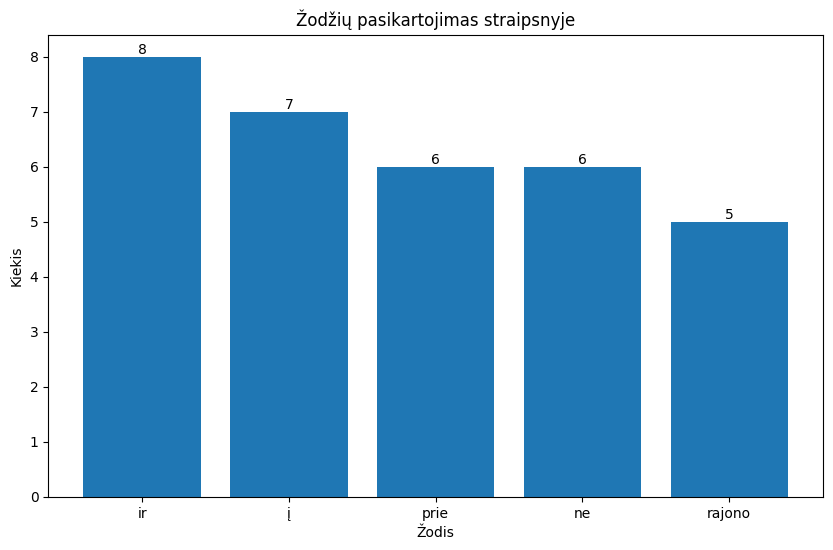

In [120]:
fig, axes = plt.subplots(figsize=(10,6))
axes.set_title('Žodžių pasikartojimas straipsnyje')
# ax = sns.barplot(data=df_str, x = 'Pav', y='Ant_ilgis', ax=axes)
axes.set(ylabel='Kiekis',xlabel='Žodis')
# # axes.legend(labels=df_str['Ant_ilgis'])
# for container in ax.containers:
#     ax.bar_label(container)
# plt.show()
a = axes.bar(str_df['Zodis'],str_df['Kiekis'])
axes.bar_label(a)
# axes.set_title('Dalyvių skaičius')
plt.show()

In [128]:
# Suskaičiuokite, kiek vidutiniškai turi žodžių straipsniai, esantys Kauno dienoje.
straipsniu_zodziai = []
for nuoroda in strp_nuor:
    if "www.diena.lt" not in nuoroda:
        page = requests.get(nuoroda)
        source = page.content
        bs = BeautifulSoup(source, 'html.parser')

        straipsniai = bs.find_all('span', {'itemprop':'articleBody'})
        straipsnis = straipsniai[0].text
        zodziai = straipsniai[0].text.split()
        straipsniu_zodziai.append(len(zodziai))
    else:
        print("Neteisinga nuoroda :",nuoroda)
vid_skaic = sum(straipsniu_zodziai)/len(straipsniu_zodziai)
print(vid_skaic)

Neteisinga nuoroda : https://www.diena.lt/naujienos/vilnius/menas-ir-pramogos/kompozitoriui-svarbu-ir-savitumas-ir-ieskojimai-1195197
390.42857142857144


In [166]:

# atlikite tą patį su delfi.lt, palyginkite tarpusavyje kauno dieną ir delfi.lt, palyginimus
# atlikite pateikdami grafikus.

delfi_url = 'https://www.delfi.lt/'
page = requests.get(delfi_url)
source = page.content
bs = BeautifulSoup(source, 'html.parser')

In [168]:
straipsniai = bs.find_all('div', {'class':'block-type-102-headline__title'})
print(len(straipsniai))

71


In [147]:
for s in straipsniai:
    i = s.find('div', {'class':'ticles-list-title-wrapper'})
    print(s['href'])

KeyError: 'href'

In [140]:
strp_pav = []
strp_nuor = []
ant_ilg = []

for s in straipsniai:
    i = s.find('div', {'class':'block-type-102-headline__title'})
    if i is not None:
        t = i.find('a', {'class':'articles-list-title'})
        strp_pav.append(t.text)
        ant_ilg.append(len(t.text.split()))
        x = t['href']
        c = x.count('http')
        if c !=0:
            strp_nuor.append(x)
        else:
            strp_nuor.append(url+x)
avg_ant_ilg = sum(ant_ilg)/len(ant_ilg)        
print(strp_pav,'\n',strp_nuor, '\n', ant_ilg, '\n', avg_ant_ilg)

ZeroDivisionError: division by zero

In [ ]:
# Pavyzdžiai
# https://scrapeops.io/python-web-scraping-playbook/python-beautifulsoup-findall/